In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
#Load Data on environmental factors(indicators) per county
df = pd.read_csv("indicators_per-industry_per-county.csv")
df

,Unnamed: 0,fips,county,name,industry_code,industry_detail,relevant_naics,year,payann,estab,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,0,8001,1,"Adams County, Colorado",113000,timber and raw forest products,[113],2012,0,1,...,0.000000e+00,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,1,8001,1,"Adams County, Colorado",115000,agriculture and forestry support,[115],2012,290,6,...,7.965438e-05,0.0,3.405586,0.0,1.827157e-04,8.769207e-03,0.958770,2.011564,211.423463,15.653502
2,2,8001,1,"Adams County, Colorado",211000,unrefined oil and gas,[211],2012,0,6,...,0.000000e+00,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
3,3,8001,1,"Adams County, Colorado",2122a0,"iron, gold, silver, and other metal ores","[21221, 21222, 21229]",2012,0,1,...,0.000000e+00,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,4,8001,1,"Adams County, Colorado",212310,dimensional stone,[21231],2012,0,4,...,0.000000e+00,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306027,306027,32510,510,"Carson City, Nevada",812300,dry-cleaning and laundry,[8123],2012,0,4,...,0.000000e+00,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
306028,306028,32510,510,"Carson City, Nevada",812900,"pet care, photofinishing, parking and other su...",[8129],2012,331,4,...,1.483303e-05,0.0,2.148818,0.0,1.318396e-07,2.876990e-09,0.025598,0.076440,191.834961,0.096584
306029,306029,32510,510,"Carson City, Nevada",813100,religious organizations,[8131],2012,2441,13,...,1.670618e-07,0.0,6.541864,0.0,0.000000e+00,0.000000e+00,0.000000,0.312826,696.409510,2.551873
306030,306030,32510,510,"Carson City, Nevada",813a00,"grantmaking, giving, and social advocacy organ...","[8132, 8133]",2012,635,9,...,8.127071e-09,0.0,4.713797,0.0,0.000000e+00,0.000000e+00,0.000000,0.020206,440.264876,0.051385


In [45]:
#sum over each factor for a county
df_county_indicators=df.drop('year', axis=1).groupby(['fips']).sum()
df_county_indicators

,Unnamed: 0,county,payann,estab,emp,ACID,ENRG,ETOX,EUTR,FOOD,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
fips,,,,,,,,,,,,,,,,,,,,,
1001,22002344,91,128668,594,4954,299.152569,7.286445e+05,1963.026340,26.933851,709.634497,...,0.050200,0.000000e+00,2149.369209,4.351692e+05,0.002923,3.497395e-02,293475.377416,2949.632736,79914.159702,7851.498268
1003,41609466,516,953498,3340,32629,133.420049,6.931874e+03,3765.662479,132.635472,4843.498718,...,0.057225,1.674254e+04,16148.087370,4.932628e+03,0.007422,8.577729e-02,1999.246044,4438.579174,576096.081165,1633.902304
1005,19847485,410,53138,361,1715,102.817249,6.064801e+00,3298.083216,13.598555,126.810329,...,0.002351,0.000000e+00,554.606997,0.000000e+00,0.000153,4.371549e-02,6.064801,3649.913530,29611.275038,511.844967
1007,16221839,469,20778,205,655,30.042694,2.012683e+04,1807.410043,4.819015,76.420984,...,0.006445,0.000000e+00,309.053357,0.000000e+00,0.000593,2.437340e-02,20126.828138,1064.780004,10666.884789,285.555832
1009,23008810,855,61132,455,2161,32.192658,1.131970e+01,416.998063,4.320160,232.490017,...,0.004599,0.000000e+00,896.650774,0.000000e+00,0.002463,6.501047e-03,11.319704,1165.911030,36511.029249,98.727235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,6352509,3774,491651,989,9029,587.935749,3.629382e+06,813.473206,105.117742,1001.624899,...,0.063982,1.394053e+06,4115.339612,3.628234e+06,0.003711,8.917167e-03,1147.804947,19410.599796,312217.341832,5945.474594
56039,7237066,4524,361056,1402,8689,37.178584,9.249760e+02,7592.166446,25.091516,2044.202199,...,0.020598,8.200278e+00,6423.591808,4.857347e+02,0.003347,2.019774e-01,439.241290,1412.961358,210925.667302,1777.330068
56041,5811849,3813,145379,442,3287,96.737078,1.919977e+06,112.140420,13.936063,384.841414,...,0.011720,3.997271e+05,1420.508279,1.919961e+06,0.000773,4.621011e-04,16.608615,3486.862556,97322.166731,582.400056


In [85]:
cancer_df = pd.read_csv("incidencerates.csv")
cancer_df = cancer_df[['fips','annual_count_avg']]  # 'trend_last_5' missing data in 10 counties
cancer_df.loc[(cancer_df['annual_count_avg'] == '3 or fewer'),'annual_count_avg']='3'
#cancer_df['annual_count_avg'].replace({r'[^\x00-\x7F]+':'0'}, regex=True, inplace=True)
#cancer_df['annual_count_avg'].replace({'*':'0'}, regex=False, inplace=True
cancer_df['annual_count_avg'] = pd.to_numeric(cancer_df['annual_count_avg'], errors='coerce')

cancer_df.astype({'annual_count_avg': 'float32'}).dtypes
df_cancer=cancer_df.groupby(['fips']).sum()
df_cancer.dropna()

,annual_count_avg
fips,
0.0,588561076.0
1000.0,184011.0
1001.0,2179.0
1003.0,8579.0
1005.0,1052.0
...,...
56037.0,1231.0
56039.0,773.0
56041.0,635.0


In [79]:
df_merge_col = pd.merge(df_county_indicators, df_cancer, on='fips')
df_merge_col.to_csv("merged_indicatorsVSCancer.csv", index=False)
df_merge_col

,Unnamed: 0,county,payann,estab,emp,ACID,ENRG,ETOX,EUTR,FOOD,...,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR,annual_count_avg
fips,,,,,,,,,,,,,,,,,,,,,
1001,22002344,91,128668,594,4954,299.152569,7.286445e+05,1963.026340,26.933851,709.634497,...,0.000000e+00,2149.369209,4.351692e+05,0.002923,3.497395e-02,293475.377416,2949.632736,79914.159702,7851.498268,2179.0
1003,41609466,516,953498,3340,32629,133.420049,6.931874e+03,3765.662479,132.635472,4843.498718,...,1.674254e+04,16148.087370,4.932628e+03,0.007422,8.577729e-02,1999.246044,4438.579174,576096.081165,1633.902304,8579.0
1005,19847485,410,53138,361,1715,102.817249,6.064801e+00,3298.083216,13.598555,126.810329,...,0.000000e+00,554.606997,0.000000e+00,0.000153,4.371549e-02,6.064801,3649.913530,29611.275038,511.844967,1052.0
1007,16221839,469,20778,205,655,30.042694,2.012683e+04,1807.410043,4.819015,76.420984,...,0.000000e+00,309.053357,0.000000e+00,0.000593,2.437340e-02,20126.828138,1064.780004,10666.884789,285.555832,961.0
1009,23008810,855,61132,455,2161,32.192658,1.131970e+01,416.998063,4.320160,232.490017,...,0.000000e+00,896.650774,0.000000e+00,0.002463,6.501047e-03,11.319704,1165.911030,36511.029249,98.727235,2327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,6352509,3774,491651,989,9029,587.935749,3.629382e+06,813.473206,105.117742,1001.624899,...,1.394053e+06,4115.339612,3.628234e+06,0.003711,8.917167e-03,1147.804947,19410.599796,312217.341832,5945.474594,1231.0
56039,7237066,4524,361056,1402,8689,37.178584,9.249760e+02,7592.166446,25.091516,2044.202199,...,8.200278e+00,6423.591808,4.857347e+02,0.003347,2.019774e-01,439.241290,1412.961358,210925.667302,1777.330068,773.0
56041,5811849,3813,145379,442,3287,96.737078,1.919977e+06,112.140420,13.936063,384.841414,...,3.997271e+05,1420.508279,1.919961e+06,0.000773,4.621011e-04,16.608615,3486.862556,97322.166731,582.400056,635.0


In [89]:
data=df_merge_col[['ACID', 'ENRG',
       'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP',
       'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST',
       'REN', 'SMOG', 'VADD', 'WATR', 'annual_count_avg']]
data=data.rename(columns={'annual_count_avg': "cancer"})

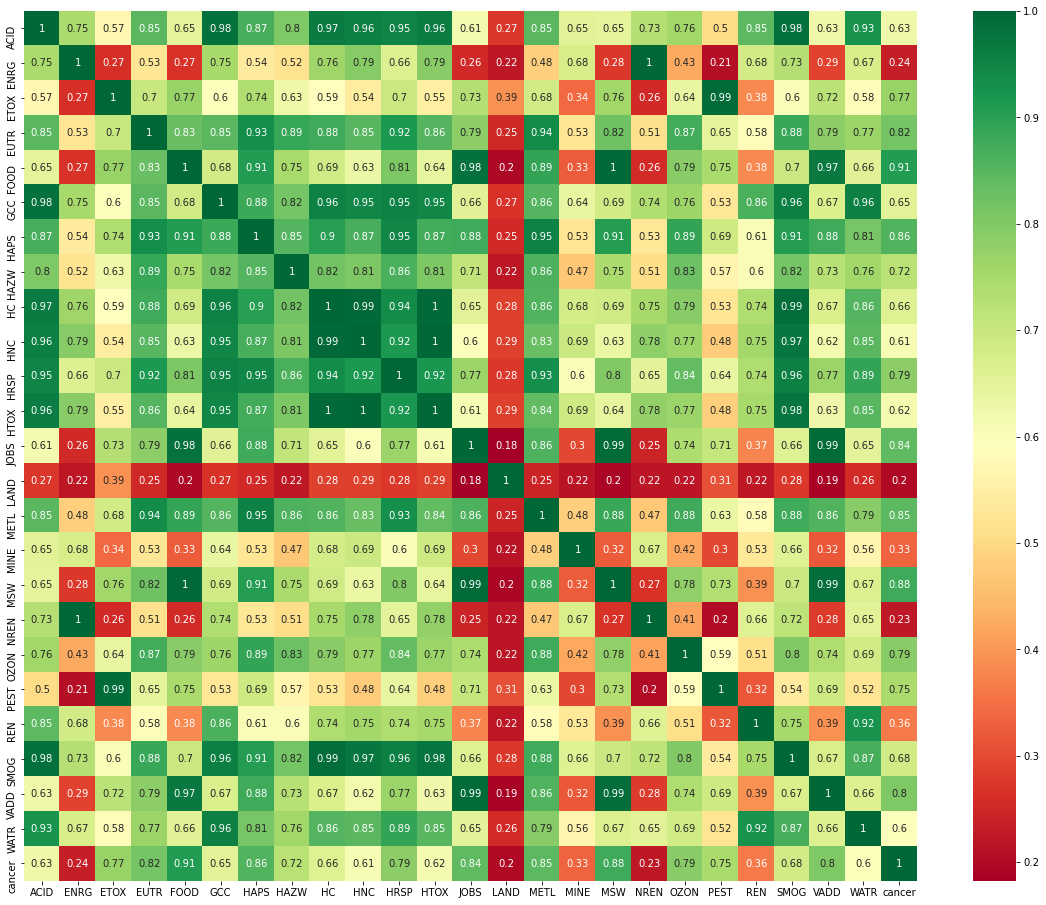

In [90]:
X = data.iloc[:,0:24]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,16))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

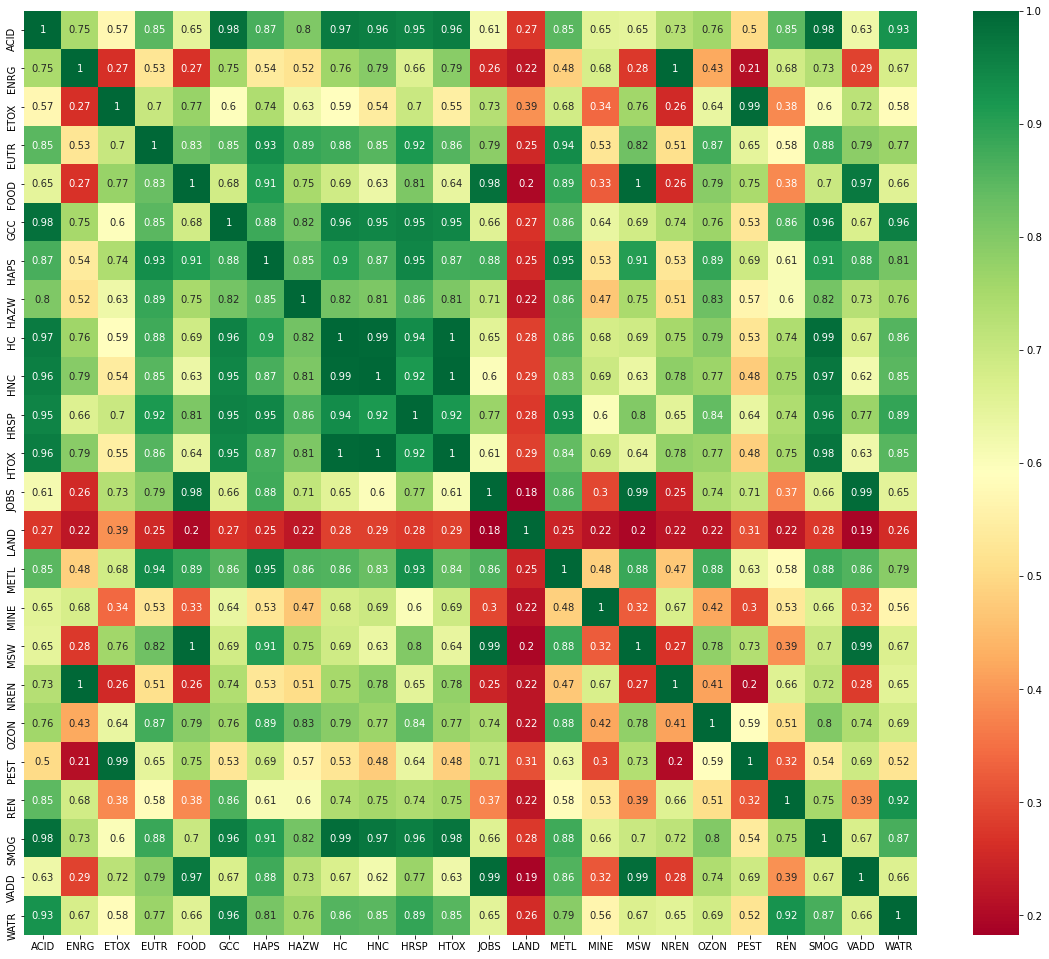

In [92]:
#get correlations of each features in dataset EXCEPT CANCER
corrmat = data.iloc[:,0:24].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,17))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")